In [1]:
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
def frange(x, amplitude, offset, centre, interfrange):
    return offset + amplitude*cos(2*pi*(x-centre)/interfrange)

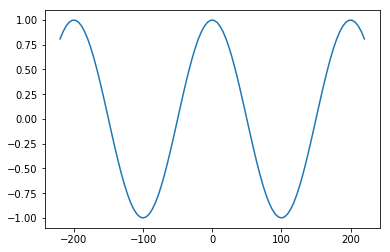

In [3]:
x = linspace(-220, 220, 100)
p0 = (1, 0, 0, 200)

plot(x, frange(x, *p0))
#plot(x, frange(x, p0[0, p0[1], p[2]]))

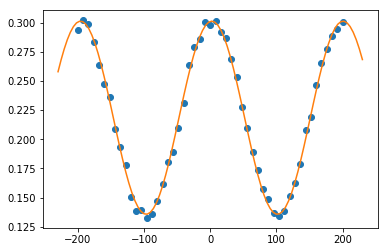

In [4]:
x_exp, y_exp = loadtxt('data/fit_sinus.dat', unpack=True)
x_plot = linspace(-230, 230, 100)
p0 = ((y_exp.max() - y_exp.min())/2, y_exp.mean(), 0, 200)

plot(x_exp, y_exp, 'o')
#plot(x_plot, frange(x_plot, *p0))
popt, cor_mat = curve_fit(frange, x_exp, y_exp, p0)
plot(x_plot, frange(x_plot, *popt))

In [5]:
print("Centre {:.2f}\u00B1{:.2f} Hz".format(popt[2], sqrt(cor_mat[2,2])))

Centre 2.37±0.32 Hz


# Loi de poisson

In [6]:
Gamma = 1
f_0 = 0
amplitude = 5

f_mesure = linspace(-3, 3, 51)

def lorentz(f, amplitude=amplitude, f_0=f_0, Gamma=Gamma):
    return amplitude/(1+((f-f_0)/Gamma)**2)

def simulate_data():
    return np.random.poisson(lam=lorentz(f_mesure))

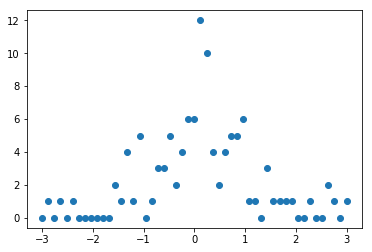

In [7]:
data = simulate_data()
plot(f_mesure, data, 'o')

0.13938959525950023

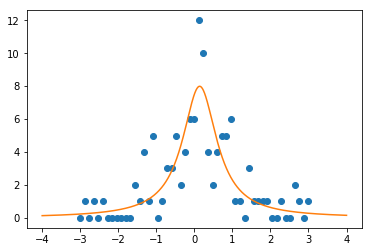

In [8]:
popt, _ = curve_fit(lorentz, f_mesure, data)
plot(f_mesure, data, 'o')
f_plot = linspace(-4, 4, 1000)
plot(f_plot, lorentz(f_plot, *popt))
popt[1]

In [9]:
from scipy.optimize import minimize
from scipy.stats import poisson

def log_likelihood(parameters, x, y):
    amplitude, f_0, Gamma = parameters
    # x : frequence
    lambdas_estime = lorentz(x, amplitude, f_0, Gamma)
    # sum(log(probabilité d'avoir y_i sachant que lmabda_i))
    # sum(log(z = lambda_i**y_i/y_i!*exp(-lambda_i)))
    z = poisson.pmf(y, lambdas_estime)
    return (-log(z)).sum()

In [10]:
p0 = [4, 0, 1]
out = minimize(log_likelihood, p0, args=(f_mesure, data),
                bounds=[(0, None), (None, None), (None, None)])
print(out['x'][1])

0.145835871651


In [11]:
def estmation_centre_moindre_carre():
    data = simulate_data()
    popt, _ = curve_fit(lorentz, f_mesure, data)
    return popt[1]

moindre_carre = [estmation_centre_moindre_carre() for _ in range(10000)]
moindre_carre = array(moindre_carre)
print(moindre_carre.std())

0.141817009705


In [12]:
def estmation_centre_max_likelihood():
    data = simulate_data()
    out = minimize(log_likelihood, p0, args=(f_mesure, data),
                bounds=[(0, None), (None, None), (None, None)])
    return out['x'][1]

max_likelihood = [estmation_centre_max_likelihood() for _ in range(10000)]
max_likelihood = array(max_likelihood)
print(max_likelihood.std())

0.129700240002


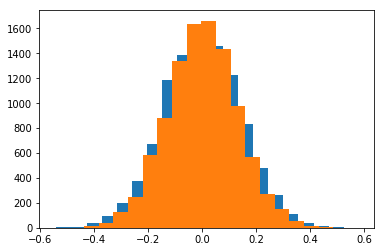

In [13]:
hist(moindre_carre, bins=20);
hist(max_likelihood, bins=20);